## Reanalysing data from Ren et al 2018
[Species divergence and maintenance of species cohesion of three closely
related Primula species in the Qinghai–Tibet Plateau](https://onlinelibrary.wiley.com/doi/full/10.1111/jbi.13415)

Have to install an older version of toytree: `conda install toytree=0.1.6 -c eaton-lab

### Analysis resources
* [ipyrad PCA intro (RADCamp)](https://radcamp.github.io/NYC2018/04_PCA_API.html)
* [ipyrad PCA analysis advanced features](https://radcamp.github.io/NYC2018/PCA_Advanced_Features.html)  

### Data resources
* [ncbi project page](https://www.ncbi.nlm.nih.gov/bioproject?LinkName=biosample_bioproject&from_uid=9098330)  
* [SRRs on ncbi](https://www.ncbi.nlm.nih.gov/Traces/study/?WebEnv=NCID_1_59445415_130.14.22.33_5555_1541696824_844957733_0MetA0_S_HStore&query_key=5)




In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

import ipyrad as ip
import ipyrad.analysis as ipa
import ipyparallel as ipp
import pandas as pd
import numpy as np
from IPython.display import display

In [8]:
ipyclient = ipp.Client()
print(len(ipyclient[:]))

40


In [10]:
sra = ipa.sratools(accession="SRR7137129", workdir="fastqs")
sra.run(force=True, ipyclient=ipyclient)

[####################] 100%  Downloading fastq files | 0:01:42 |  
1 fastq files downloaded to /media/4TB/isaac/ipyrad/test-data/ren_et_al-SE-ddRAD/fastqs


In [5]:
meta_df = pd.read_csv("fastqs/SraRunTable.txt", sep="\t")
display(meta_df)
samps = meta_df["Library_Name"]
sites = list(set([x.split("-")[0] for x in samps]))
print("nsamps {}\tnsites {})".format(len(samps), len(sites)))
sorted(samps)
subsamps = []
for site in sites:
    tmplist = [x for x in samps if site in x]
    subset = np.random.choice(tmplist, size=5)
    subsamps.extend(subset)
print(len(subsamps))
subsamp = subsamps[:10]

,BioSample,Experiment,Library_Name,LoadDate,MBases,MBytes,Organism,ReleaseDate,Run,SRA_Sample,...,LibraryLayout,LibrarySelection,LibrarySource,Platform,SRA_Study,age,cultivar,dev_stage,ecotype,tissue
0,SAMN09097723,SRX4058256,PN13-primula_170.fq.gz,2018-05-09,162,81,Primula nutans,2018-05-09,SRR7137129,SRS3275020,...,SINGLE,Restriction Digest,GENOMIC,ILLUMINA,SRP145052,not applicated,not applicated,not applicated,not applicated,leaf
1,SAMN09097724,SRX4058255,PN13-primula_171.fq.gz,2018-05-09,66,34,Primula nutans,2018-05-09,SRR7137130,SRS3275016,...,SINGLE,Restriction Digest,GENOMIC,ILLUMINA,SRP145052,not applicated,not applicated,not applicated,not applicated,leaf
2,SAMN09097810,SRX4058254,PT16-primula_260.fq.gz,2018-05-09,152,79,Primula tibetica,2018-05-09,SRR7137131,SRS3275019,...,SINGLE,Restriction Digest,GENOMIC,ILLUMINA,SRP145052,not applicated,not applicated,not applicated,not applicated,leaf
3,SAMN09097809,SRX4058253,PT16-primula_259.fq.gz,2018-05-09,138,72,Primula tibetica,2018-05-09,SRR7137132,SRS3275018,...,SINGLE,Restriction Digest,GENOMIC,ILLUMINA,SRP145052,not applicated,not applicated,not applicated,not applicated,leaf
4,SAMN09098098,SRX4058252,PF01-primula_539.fq.gz,2018-05-09,94,48,Primula fasciculata,2018-05-09,SRR7137133,SRS3275017,...,SINGLE,Restriction Digest,GENOMIC,ILLUMINA,SRP145052,not applicated,not applicated,not applicated,not applicated,leaf
5,SAMN09097721,SRX4058251,PN13-primula_168.fq.gz,2018-05-09,349,168,Primula nutans,2018-05-09,SRR7137134,SRS3275015,...,SINGLE,Restriction Digest,GENOMIC,ILLUMINA,SRP145052,not applicated,not applicated,not applicated,not applicated,leaf
6,SAMN09098092,SRX4058250,PT07-primula_813.fq.gz,2018-05-09,220,113,Primula tibetica,2018-05-09,SRR7137135,SRS3275014,...,SINGLE,Restriction Digest,GENOMIC,ILLUMINA,SRP145052,not applicated,not applicated,not applicated,not applicated,leaf
7,SAMN09097722,SRX4058249,PN13-primula_169.fq.gz,2018-05-09,338,162,Primula nutans,2018-05-09,SRR7137136,SRS3275012,...,SINGLE,Restriction Digest,GENOMIC,ILLUMINA,SRP145052,not applicated,not applicated,not applicated,not applicated,leaf
8,SAMN09098294,SRX4058248,PF10-primula_818.fq.gz,2018-05-09,112,60,Primula fasciculata,2018-05-09,SRR7137137,SRS3275013,...,SINGLE,Restriction Digest,GENOMIC,ILLUMINA,SRP145052,not applicated,not applicated,not applicated,not applicated,leaf
9,SAMN09098293,SRX4058247,PF07-primula_777.fq.gz,2018-05-09,241,124,Primula fasciculata,2018-05-09,SRR7137138,SRS3275007,...,SINGLE,Restriction Digest,GENOMIC,ILLUMINA,SRP145052,not applicated,not applicated,not applicated,not applicated,leaf


nsamps 770	nsites 43)
215


In [41]:
print(len(subsamps))
subsamp_df = meta_df.loc[meta_df["Library_Name"].isin(subsamps)]
print(len(subsamp_df))
SRRs = subsamp_df["Run"]
SRRs

215
184


10     SRR7137139
15     SRR7137144
16     SRR7137145
21     SRR7137150
24     SRR7137192
25     SRR7137191
26     SRR7137190
30     SRR7137186
38     SRR7137178
40     SRR7137176
41     SRR7137175
52     SRR7137164
59     SRR7137157
62     SRR7137154
65     SRR7137151
66     SRR7137282
68     SRR7137280
69     SRR7137279
75     SRR7137273
77     SRR7137271
78     SRR7137270
81     SRR7137267
87     SRR7137261
99     SRR7137249
103    SRR7137245
104    SRR7137244
105    SRR7137243
106    SRR7137242
109    SRR7137239
112    SRR7137236
          ...    
660    SRR7137660
665    SRR7137655
668    SRR7137652
679    SRR7137641
680    SRR7137640
684    SRR7137891
685    SRR7137890
687    SRR7137887
691    SRR7137882
694    SRR7137879
695    SRR7137878
698    SRR7137875
705    SRR7137868
708    SRR7137865
711    SRR7137862
714    SRR7137859
720    SRR7137853
721    SRR7137852
722    SRR7137851
725    SRR7137848
728    SRR7137845
729    SRR7137844
738    SRR7137835
745    SRR7137828
747    SRR

In [61]:
for SRR in SRRs:
    print(SRR)
    try:
        sra = ipa.sratools(accession=SRR, workdir="fastqs")
        sra.run(ipyclient=ipyclient)
    except:
        print("SRR failed - {}".format(SRR))

SRR7137139
SRR failed - SRR7137139
SRR7137144
SRR failed - SRR7137144
SRR7137145
SRR failed - SRR7137145
SRR7137150
SRR failed - SRR7137150
SRR7137192
SRR failed - SRR7137192
SRR7137191
SRR failed - SRR7137191
SRR7137190
SRR failed - SRR7137190
SRR7137186
SRR failed - SRR7137186
SRR7137178
[skip] file already exists: /media/4TB/isaac/ipyrad/test-data/ren_et_al-SE-ddRAD/fastqs/primula_354.fastq.gz
[                    ]   0%  Downloading fastq files | 0:00:08 |  keyboard interrupt...
SRR failed - SRR7137178
SRR7137176
[####################] 100%  Downloading fastq files | 0:01:44 |  
1 fastq files downloaded to /media/4TB/isaac/ipyrad/test-data/ren_et_al-SE-ddRAD/fastqs
SRR7137175
SRR failed - SRR7137175
SRR7137164
SRR failed - SRR7137164
SRR7137157
SRR failed - SRR7137157
SRR7137154
SRR failed - SRR7137154
SRR7137151
SRR failed - SRR7137151
SRR7137282
SRR failed - SRR7137282
SRR7137280
SRR failed - SRR7137280
SRR7137279
SRR failed - SRR7137279
SRR7137273
SRR failed - SRR7137273
SRR7137

Using default cmap: Spectral


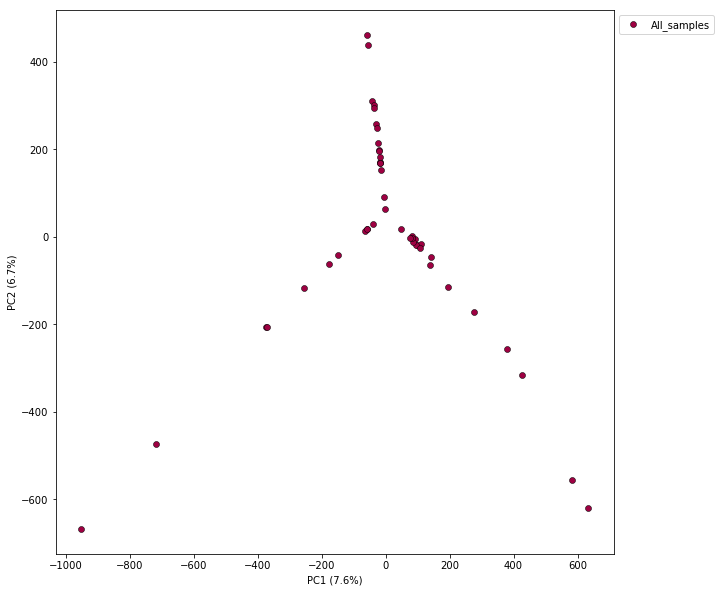

In [38]:
pca = ipa.pca("ren_outfiles/ren.vcf")
fig, ax = plt.subplots(figsize=(10, 10))
pca.plot(ax=ax)

Using default cmap: Spectral


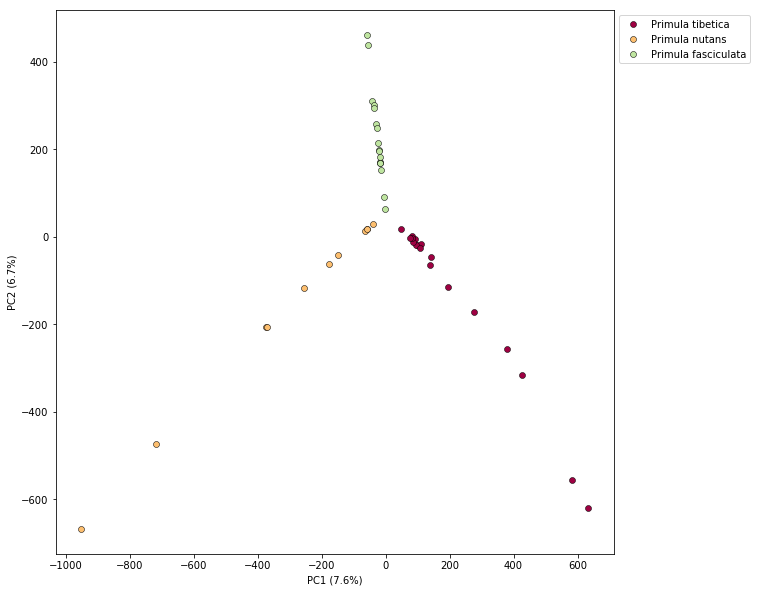

In [20]:
subsamps = pca.samples_vcforder
meta_df[["Sample_Name", "Organism"]]
subsamp_df = meta_df.loc[meta_df["Sample_Name"].isin(subsamps)]
popdict = {'Primula nutans':[], 'Primula tibetica':[], 'Primula fasciculata':[]}
for k,v in subsamp_df[["Sample_Name", "Organism"]].values:
    popdict[v].append(k)
fig, ax = plt.subplots(figsize=(10, 10)) 
pca = ipa.pca("ren_outfiles/ren.vcf", pops=popdict)
pca.plot(ax=ax)

## Now what happens when we hash the data too much

In [28]:
display(pca.get_missing_per_sample())
missingness = pca.missingness()
display(missingness)

primula_102    232088
primula_103    229158
primula_126    180785
primula_167    236479
primula_170    196228
primula_190    145626
primula_242    184884
primula_314    173403
primula_322    230348
primula_356    182191
primula_370    196150
primula_387    201241
primula_398    201474
primula_400    195968
primula_401    187489
primula_438    208273
primula_449    202857
primula_466    148077
primula_468    167480
primula_493    204361
primula_50     206959
primula_528    202703
primula_529    204382
primula_530    208803
primula_546    161524
primula_555    159333
primula_563    175621
primula_6      158131
primula_601    199162
primula_613    241923
primula_623    185822
primula_65     212313
primula_678    192139
primula_715    169352
primula_716    189537
primula_726    227536
primula_755    198381
primula_757    192344
primula_765    203676
primula_809    140886
primula_812    145992
primula_819    185700
primula_824    203900
primula_829    170963
primula_844    180859
primula_99

,Full,primula_809,primula_190,primula_812,primula_466,primula_6
0,66,65,67,66,69,73
1,117,114,114,113,115,113
2,196,191,193,198,201,197
3,348,344,342,340,341,333
4,501,494,492,488,485,473
5,727,723,720,714,714,699
6,965,953,950,940,948,942
7,1343,1330,1325,1308,1322,1319
8,1769,1757,1769,1755,1761,1764
9,2245,2235,2235,2203,2217,2203


Using default cmap: Spectral


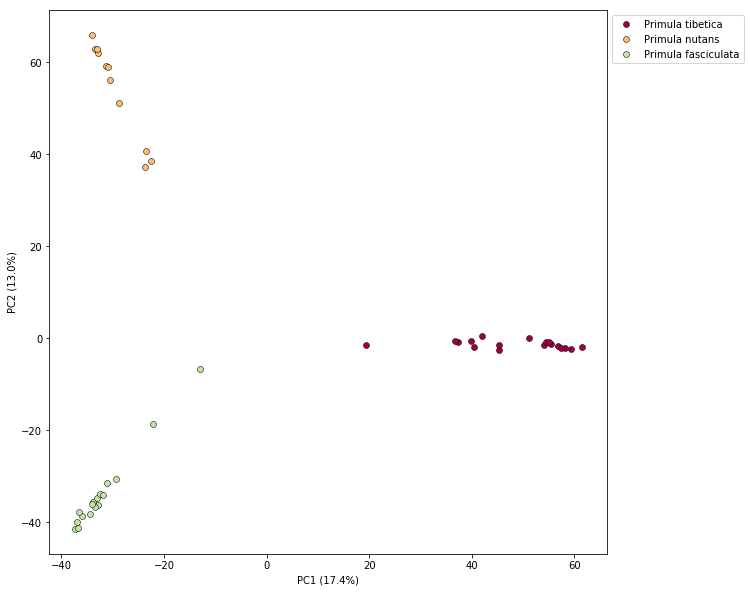

In [41]:
pca = ipa.pca("ren_outfiles/ren.vcf", pops=popdict)
pca.trim_missing(10)
fig, ax = plt.subplots(figsize=(10, 10)) 
pca.plot(ax=ax)

0
Using default cmap: Spectral
2
Using default cmap: Spectral
4
Using default cmap: Spectral
6
Using default cmap: Spectral
8
Using default cmap: Spectral
10
Using default cmap: Spectral


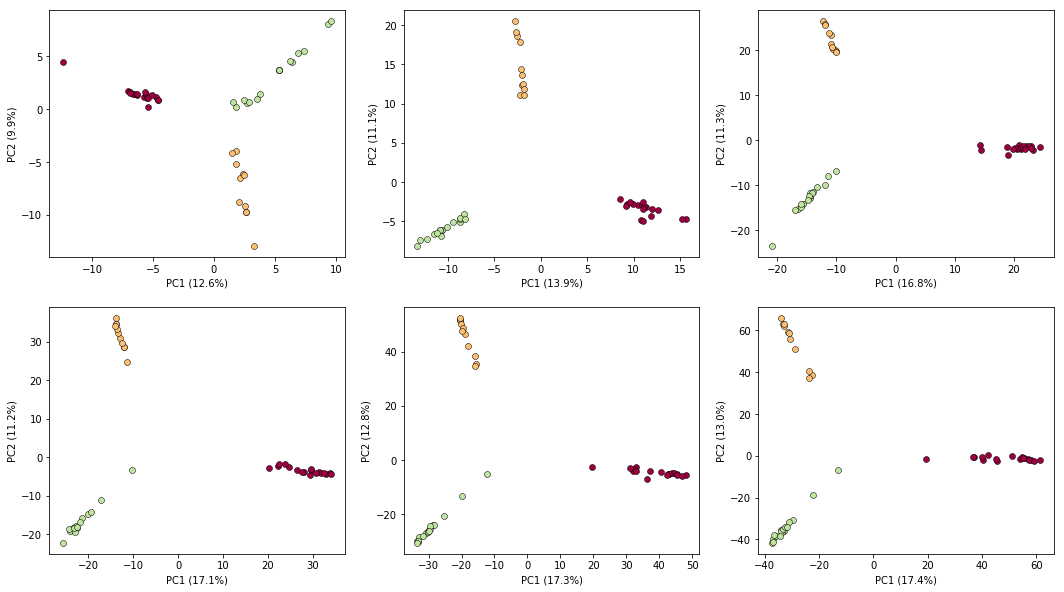

In [37]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = [ax for sublist in axs for ax in sublist]
for i, ax in zip(range(0, 2*len(axs), 2), axs):
    print(i)
    pca = ipa.pca("ren_outfiles/ren.vcf", pops=popdict)
    pca.trim_missing(i)
    pca.plot(ax=ax, legend=False)


Using default cmap: Spectral


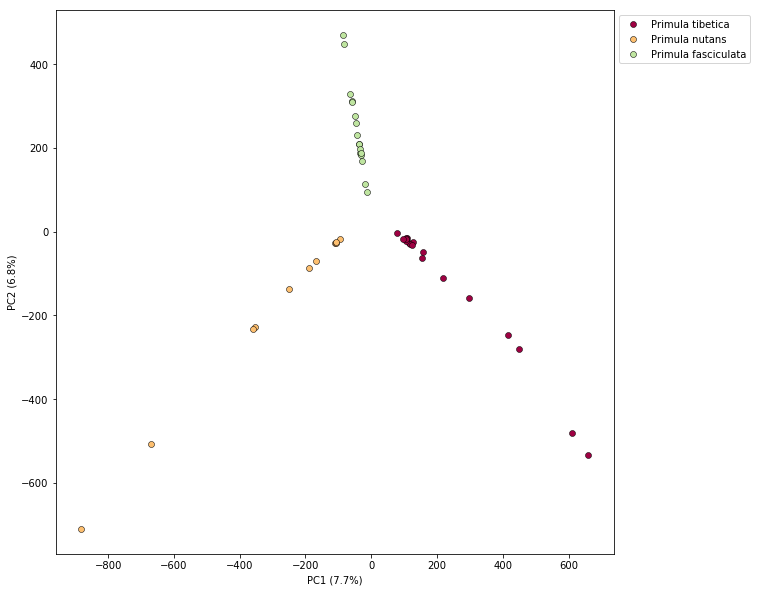

In [39]:
pca = ipa.pca("ren_outfiles/ren.vcf", pops=popdict)
pca.fill_missing()
fig, ax = plt.subplots(figsize=(10, 10)) 
pca.plot(ax=ax)


Using default cmap: Spectral
Using default cmap: Spectral


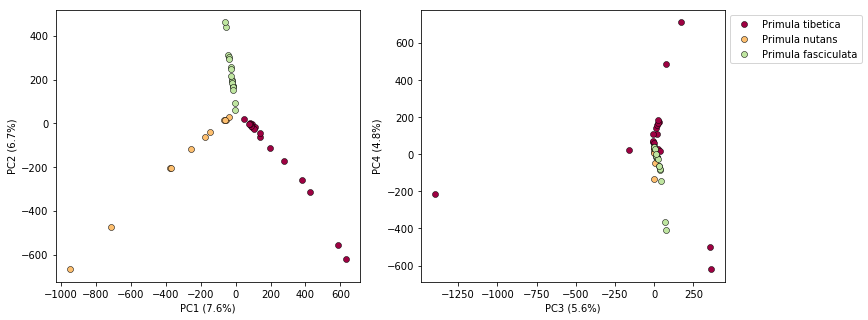

In [22]:
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

## The difference here is we switch off the legend on the first PCA
pca.plot(ax=ax1, pcs=[1, 2], legend=False)
pca.plot(ax=ax2, pcs=[3, 4])
